In [1]:
# 1. Import thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [2]:
# 2. Đọc file csv và gắng index với giá Close
data = pd.read_csv('PVS Historical Data.csv')

# Tiền xử lí dữ liệu
# Hàm chuyển đổi "Vol." từ chuỗi sang số
def convert_volume_to_number(volume_str):
    if volume_str[-1] == 'K':
        return int(float(volume_str[:-1]) * 1000)
    elif volume_str[-1] == 'M':
        return int(float(volume_str[:-1]) * 1000000)
    elif volume_str[-1] == 'B':
        return int(float(volume_str[:-1]) * 1000000000)
    else:
        return int(volume_str)
    
# Áp dụng hàm chuyển đổi cho cột "Vol."
data["Vol."] = data["Vol."].apply(convert_volume_to_number)

# Hàm chuyển đổi "Change %" từ chuỗi sang số
def convert_change_to_number(change_str):
    new_change = float(change_str.strip('%')) / 100
    return new_change

# Áp dụng hàm chuyển đổi cho cột "Change %"
data["Change %"] = data["Change %"].apply(convert_change_to_number)

# Hàm chuyển giá từ chuỗi sang số
def convert_str_to_number(str):
    return float(str.replace(',', ''))

# Áp dụng hàm chuyển đổi cho các cột giá trị
data['Price'] = data['Price'].apply(convert_str_to_number)
data['Open'] = data['Open'].apply(convert_str_to_number)
data['High'] = data['High'].apply(convert_str_to_number)
data['Low'] = data['Low'].apply(convert_str_to_number)

data

df1=data.reset_index()['Price']

In [3]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [4]:
# 4. Chia train test
train_size = int(0.8 * len(df1))
test_size = int(0.15 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

In [5]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [6]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 30
X_train, y_train = create_dataset(train_data, time_step)
X_val, yval = create_dataset(val_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [7]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
X_val = X_val.reshape(X_val.shape[0],X_val.shape[1] , 1)

In [8]:
# 8. Define LSTM Model

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(time_step, 1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [9]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
17/17 [==============================] - 8s 118ms/step - loss: 0.0485 - val_loss: 0.0197
Epoch 2/100
17/17 [==============================] - 1s 33ms/step - loss: 0.0090 - val_loss: 0.0051
Epoch 3/100
17/17 [==============================] - 1s 36ms/step - loss: 0.0053 - val_loss: 0.0043
Epoch 4/100
17/17 [==============================] - 1s 35ms/step - loss: 0.0044 - val_loss: 0.0043
Epoch 5/100
17/17 [==============================] - 1s 36ms/step - loss: 0.0042 - val_loss: 0.0040
Epoch 6/100
17/17 [==============================] - 1s 36ms/step - loss: 0.0040 - val_loss: 0.0037
Epoch 7/100
17/17 [==============================] - 1s 36ms/step - loss: 0.0038 - val_loss: 0.0035
Epoch 8/100
17/17 [==============================] - 1s 37ms/step - loss: 0.0035 - val_loss: 0.0030
Epoch 9/100
17/17 [==============================] - 1s 34ms/step - loss: 0.0032 - val_loss: 0.0027
Epoch 10/100
17/17 [==============================] - 1s 35ms/step - loss: 0.0030 - val_loss: 0.002

17/17 [==============================] - 1s 36ms/step - loss: 7.2012e-04 - val_loss: 9.9156e-04
Epoch 80/100
17/17 [==============================] - 1s 35ms/step - loss: 6.3466e-04 - val_loss: 8.6038e-04
Epoch 81/100
17/17 [==============================] - 1s 37ms/step - loss: 6.0320e-04 - val_loss: 7.9983e-04
Epoch 82/100
17/17 [==============================] - 1s 43ms/step - loss: 5.8966e-04 - val_loss: 7.9242e-04
Epoch 83/100
17/17 [==============================] - 1s 48ms/step - loss: 5.8423e-04 - val_loss: 7.9979e-04
Epoch 84/100
17/17 [==============================] - 1s 39ms/step - loss: 6.2280e-04 - val_loss: 8.7601e-04
Epoch 85/100
17/17 [==============================] - 1s 39ms/step - loss: 7.0139e-04 - val_loss: 8.8124e-04
Epoch 86/100
17/17 [==============================] - 1s 41ms/step - loss: 6.6057e-04 - val_loss: 9.5200e-04
Epoch 87/100
17/17 [==============================] - 1s 37ms/step - loss: 6.7617e-04 - val_loss: 8.6526e-04
Epoch 88/100
17/17 [============

In [10]:
# 10. Dự báo dữ liệu test, val
y_pred=model.predict(X_test)
y_pred_val=model.predict(X_val)

y_pred_new = scaler.inverse_transform(y_pred.reshape(1, -1))
y_test_new = scaler.inverse_transform(np.array([ytest], dtype=np.float32))

2/2 [==============================] - 0s 7ms/step


In [11]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
# Hàm tính MDA
def calculate_mda(y_true, y_pred):
    y_true_diff = np.diff(y_true)
    y_pred_diff = np.diff(y_pred)
    correct_direction = np.sign(y_true_diff) == np.sign(y_pred_diff)
    return np.mean(correct_direction) * 100

# Tính toán RMSE, MAE và MAPE trên tập test
test_score_rmse = np.sqrt(mean_squared_error(y_test_new, y_pred_new))
test_score_mape = mean_absolute_percentage_error(y_test_new, y_pred_new) * 100
test_score_mda = calculate_mda(y_test_new, y_pred_new)

print('RMSE trên tập test là:', test_score_rmse)
print('MAPE trên tập test là:', test_score_mape, '%')
print('MDA trên tập test là:', test_score_mda, '%')

RMSE trên tập test là: 848.72766
MAPE trên tập test là: 2.757622115314007 %
MDA trên tập test là: 44.50867052023121 %


In [12]:
# 13. Dự báo 30 ngày tiếp theo
x_input=val_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=x_input.shape[1]
i=0
while(i<30):
    
    if(len(temp_input)>x_input.shape[1]):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


[0.84218174]
11
1 day input [0.75882434 0.75539074 0.75539074 0.74165637 0.74165637 0.75195715
 0.75195715 0.73822277 0.82406263 0.84218174]
1 day output [[0.85950845]]
2 day input [0.75539074 0.75539074 0.74165637 0.74165637 0.75195715 0.75195715
 0.73822277 0.82406263 0.84218174 0.85950845]
2 day output [[0.87122494]]
3 day input [0.75539074 0.74165637 0.74165637 0.75195715 0.75195715 0.73822277
 0.82406263 0.84218174 0.85950845 0.87122494]
3 day output [[0.8840136]]
4 day input [0.74165637 0.74165637 0.75195715 0.75195715 0.73822277 0.82406263
 0.84218174 0.85950845 0.87122494 0.88401359]
4 day output [[0.8983234]]
5 day input [0.74165637 0.75195715 0.75195715 0.73822277 0.82406263 0.84218174
 0.85950845 0.87122494 0.88401359 0.89832342]
5 day output [[0.9140035]]
6 day input [0.75195715 0.75195715 0.73822277 0.82406263 0.84218174 0.85950845
 0.87122494 0.88401359 0.89832342 0.91400349]
6 day output [[0.9303901]]
7 day input [0.75195715 0.73822277 0.82406263 0.84218174 0.85950845 0.

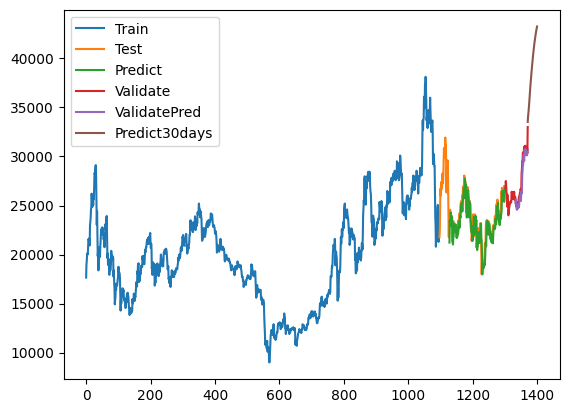

In [14]:
# 14.Vẽ hình
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+31, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(y_pred))
val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,scaler.inverse_transform(val_data))
val_data_index = pd.RangeIndex(start=train_size+test_size+31, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,scaler.inverse_transform(y_pred_val))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))
plt.legend(['Train','Test','Predict','Validate','ValidatePred','Predict30days'])
plt.show()